# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

##### Overview
At first glance, X given to us is a 4D array and y is a numpy array of labels of values. Hence this hints to me that it was a classfication problem. Since video data was given to us, from ML for hurry, I know that conv3D should be used as my NN and decided to go with it.

##### 1. Descriptive Analysis
Did some simple length counts, unique y value counts and explored more into the first video using X[0]. This gives me the info that there is -4792 in one of the pixels which is an outlier which I need to settle afterwards

##### 2. Detection and Handling of Missing Values
I identified the existence of nan values in y using the code np.sum(np.isnan(y)). Doing so gave me 250 which meant that there was 250 nan values in y in total. As this is relatively small of the total data set and I do not have any reasonable predictions to fill these nan values, I have decided to just remove them

Meanwhile for X, I realised that there were nan pixels in X which I had to handle as well. Hence, I did an SimpleImputer to fill the nan pixels in X with the strategy set to 'median'. Since X is not a numpy array but just a normal array, I had to do a loop to impute the pixels then appending back to the X_cleaned array


##### 3. Detection and Handling of Outliers
For y, there are no outliers as there are exactly 6 categories ranging from 0 to 6. I was also unable to tell if any are an outlier even if they are so I just left it as it is.

However, upon closer inspection and printing, I realised there were many pixels that were outliers. For example, there were pixels that were negative as well as pixels that are way higher than 255 (eg 4000). This meant that these invalid pixels are outliers as pixels should be [0,255]


##### 4. Detection and Handling of Class Imbalance 
Upon printing, there were heavy class imbalance on class 1 for y with about 1.5k data points. Hence, I decided to downsample this class to 300 and upsample the rest to 300 which I personally believe is a reasonable amount

The rest of the other classes including 0,2,3,4,5 all have about the same range of about 150 samples for each class.

Initially I used the total len / total unique classes but due to time limit exceeded on coursemology, decided not to do that and just stick with a small sample size of 300 each class...

##### 5. Understanding Relationship Between Variables
Initially tried to do PCA here for X but it failed.

##### 6. Data Visualization
Plotted labels (y) against mean pixel intensity of frames in X. however not much could be observed here as the mean pixel intensity are all about the same within the range of 206 to 220 so I moved on to the next step without doing much

##### 7. General Preprocessing
There were no categorical variables in dataset X or y so there is no need to perform one-hot encoding /ordinal variables at all

The main work done here during preprocessing is the padding of the X frames so that they all have the same length since the length given to us initially was different and that would cause problems into the CNN network. Furthermore, I also converted the paddedvideo into a tensor as the CNN network can only take in tensors as input

Normalization was also done to allow for better convergence as larger values could dominate due to their numerically large value

Used train_test_split here to split data into X_train, X_test, y_train and y_test so that we can use them separately for their own purposes

##### 8. Feature Selection 
Model does not require any feature selection as there were no features in the first place. Data given to us were videos and we are unable to judge which "features" are important and which are not. Furthermore, MaxPool3D is used in our model later so the pixels we select are not necessarily that "important", also MaxPool3D inherently helps us to do feature selection.

##### 9. Feature Engineering
Not possible to do feature engineering here as there were no way for us to duplicate more videos into X^2 for example. Even if we square and make more frames, these frames would be quite meaningless..

##### 10. Creating Models
Created a CNN model with 3 convolutional layer. Afterwards incorporated batchNorm3d as claude mentioned how it can help to improve learning rate and stability. Standard forward and backprop was then done. Also included occasional dropout to decrease overfitting of my model to the dataset
Used Cross Entropy Loss as my loss function and then also used an Adam optimizer with lr = 0.0006 and initially with a weight decay afterwards
(many things changed after how coursemology keeps time limit exceeding, and how I had difficulties incorporating into main)

Optional:
I initially considered other models such as using conv2d as well. But it seems alot more complicated and conv3d was recommended by Claude so I just did conv3d.

Since the model only takes in video data, conv3D model is sufficient and we do not need other models for video data. However, I tried to improve this specific 1 model by varying the number of convolution layers. But due to time limit exceeded on coursemology hence I had to scale down
All other models such as linear regression were not considered since this is a classification problem. 

##### 11. Model Evaluation
Using the test data sets (x_test and y_test), we now create a test dataset and evaluate the model. Afterwords, I can calculate the f1 score using the library and it was calculated to be a consistent high 0.9s here

##### 12. Hyperparameters Search
From Claude, I put all possible ideal hyperparameters into a param_grid then I run the various combinations to evaluate the F1 scores when using each combination. Eventually, I found that:

Best Hyperparameters: {'batch_size': 16, 'dropout_prob': 0.3, 'learning_rate': 0.001, 'num_epochs': 10}
Best F1 Score: 0.9300 which are the possible hyperparameters I tried to keep increasing my F1 score


##### Conclusion
In conclusion, overall the datasets were not too difficult to process and the training was rather reasonable.

Thankfully code managed to work in the final few hours before submission and overall satisfied with the outcome...

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [2]:
import pandas as pd
import os
import numpy as np

## Load Dataset

The dataset `data.npy` consists of $N$ grayscale videos and their corresponding labels. Each video has a shape of (L, H, W). L represents the length of the video, which may vary between videos. H and W represent the height and width, which are consistent across all videos. 

A code snippet that loads the data is provided below.

### Load Data

In [3]:
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    X = data['data']
    y = data['label']
    
print('Number of data sample:', len(X))
print('Shape of the first data sample:', X[0].shape)
print('Shape of the third data sample:', X[2].shape)
print(y[1])

Number of data sample: 2500
Shape of the first data sample: (10, 16, 16)
Shape of the third data sample: (8, 16, 16)
nan


## Data Exploration & Preparation

### 1. Descriptive Analysis

In [4]:
import matplotlib.pyplot as plt

In [14]:
video_lengths = [video.shape[0] for video in X]
video_heights = [video.shape[1] for video in X]#16 for all
video_width = [video.shape[2] for video in X]#16 for all

unique_values, counts = np.unique(y, return_counts=True)
y_counts = dict(zip(unique_values, counts))
print(y_counts)

lengths, counts = np.unique(video_lengths, return_counts = True)
video_counts = dict(zip(lengths, counts))
print(video_counts)

# X[0] #first video, L x H x W (10 x 16 x 16)


{0.0: 160, 1.0: 1514, 2.0: 132, 3.0: 161, 4.0: 147, 5.0: 136, nan: 250}
{6: 495, 7: 494, 8: 520, 9: 485, 10: 506}


### 2. Detection and Handling of Missing Values

In [573]:
#detection
#nan in y
num_nans = np.sum(np.isnan(y))
nan_index = np.where(np.isnan(y))
print(num_nans)
print(nan_index)

nan_index_set = set(nan_index[0])
#handling nan values in y by deleting
X_clean = [v for i, v in enumerate(X) if i not in nan_index_set]
y_cleaned = np.delete(y, nan_index)

#check delete success
print(len(X_clean))
print(len(y_cleaned))

250
(array([   1,    3,   37,   42,   43,   62,   67,   88,   91,   92,   96,
        101,  105,  111,  114,  130,  142,  151,  154,  161,  182,  194,
        198,  204,  245,  254,  256,  257,  262,  265,  271,  276,  284,
        302,  305,  349,  364,  365,  383,  388,  390,  400,  409,  413,
        424,  430,  432,  441,  444,  455,  476,  483,  488,  492,  504,
        520,  530,  531,  534,  560,  567,  571,  574,  576,  577,  579,
        592,  597,  600,  621,  644,  653,  659,  683,  689,  691,  694,
        702,  706,  707,  708,  719,  729,  771,  773,  782,  808,  811,
        812,  823,  842,  850,  859,  860,  867,  883,  884,  926,  931,
        946,  976,  998, 1003, 1024, 1051, 1073, 1079, 1083, 1093, 1106,
       1111, 1121, 1135, 1136, 1138, 1144, 1145, 1150, 1169, 1209, 1213,
       1217, 1218, 1233, 1237, 1248, 1255, 1263, 1277, 1290, 1306, 1319,
       1327, 1328, 1346, 1350, 1379, 1381, 1401, 1414, 1421, 1426, 1432,
       1439, 1441, 1451, 1459, 1466, 1468, 147

In [574]:
#handling nan pixels in X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

X_cleaned = []

for video in X_clean:
    print(np.sum(np.isnan(video)))
    video_reshaped = video.reshape(-1, video.shape[-1])
    video_imputed = imputer.fit_transform(video_reshaped)
    
    X_cleaned.append(video_imputed.reshape(video.shape))
    print(np.sum(np.isnan(video_imputed)))

print(len(X_cleaned)) #2250 videos cleaned

24
0
20
0
14
0
25
0
15
0
21
0
17
0
25
0
19
0
14
0
19
0
23
0
15
0
25
0
23
0
15
0
23
0
16
0
15
0
17
0
25
0
17
0
20
0
15
0
23
0
25
0
22
0
20
0
20
0
23
0
19
0
23
0
17
0
20
0
20
0
14
0
17
0
22
0
22
0
17
0
22
0
22
0
17
0
24
0
14
0
24
0
25
0
19
0
15
0
17
0
15
0
17
0
25
0
19
0
15
0
17
0
23
0
22
0
22
0
23
0
22
0
17
0
20
0
19
0
17
0
20
0
15
0
20
0
17
0
18
0
17
0
23
0
25
0
23
0
16
0
15
0
22
0
15
0
19
0
17
0
20
0
20
0
17
0
17
0
18
0
14
0
23
0
20
0
17
0
15
0
17
0
22
0
17
0
23
0
14
0
23
0
17
0
20
0
15
0
14
0
15
0
15
0
20
0
15
0
17
0
13
0
15
0
14
0
20
0
15
0
17
0
19
0
15
0
15
0
17
0
23
0
22
0
23
0
15
0
25
0
17
0
17
0
23
0
17
0
20
0
25
0
19
0
24
0
15
0
24
0
16
0
23
0
20
0
17
0
25
0
20
0
20
0
22
0
19
0
25
0
22
0
22
0
16
0
17
0
22
0
17
0
20
0
15
0
16
0
25
0
20
0
22
0
22
0
25
0
24
0
15
0
17
0
15
0
19
0
23
0
17
0
23
0
23
0
17
0
15
0
24
0
16
0
17
0
20
0
14
0
15
0
19
0
22
0
20
0
21
0
22
0
17
0
17
0
19
0
25
0
17
0
14
0
20
0
17
0
23
0
16
0
23
0
22
0
20
0
25
0
24
0
25
0
18
0
19
0
14
0
17
0
22
0
15
0
15
0
23
0


0
15
0
25
0
17
0
23
0
15
0
23
0
15
0
20
0
23
0
25
0
24
0
16
0
16
0
17
0
25
0
14
0
20
0
14
0
24
0
22
0
15
0
15
0
22
0
17
0
20
0
20
0
17
0
25
0
20
0
20
0
24
0
20
0
25
0
15
0
17
0
16
0
16
0
25
0
15
0
14
0
17
0
17
0
15
0
20
0
25
0
14
0
25
0
20
0
21
0
15
0
23
0
24
0
16
0
15
0
15
0
23
0
15
0
25
0
25
0
17
0
24
0
15
0
17
0
15
0
17
0
15
0
24
0
14
0
19
0
24
0
15
0
25
0
16
0
23
0
23
0
20
0
17
0
16
0
20
0
21
0
15
0
25
0
14
0
23
0
17
0
20
0
23
0
15
0
18
0
23
0
19
0
20
0
20
0
22
0
19
0
17
0
24
0
14
0
14
0
20
0
22
0
24
0
20
0
19
0
15
0
25
0
16
0
20
0
17
0
25
0
21
0
15
0
15
0
23
0
25
0
14
0
15
0
14
0
23
0
25
0
23
0
20
0
19
0
23
0
25
0
23
0
25
0
15
0
24
0
25
0
20
0
22
0
19
0
23
0
19
0
19
0
25
0
19
0
23
0
15
0
25
0
15
0
20
0
17
0
20
0
18
0
24
0
20
0
16
0
22
0
20
0
24
0
14
0
24
0
14
0
19
0
23
0
23
0
15
0
15
0
12
0
25
0
20
0
17
0
24
0
23
0
22
0
15
0
25
0
24
0
23
0
25
0
14
0
25
0
20
0
15
0
19
0
25
0
17
0
16
0
17
0
21
0
22
0
15
0
25
0
22
0
19
0
21
0
15
0
24
0
15
0
16
0
22
0
17
0
23
0
18
0
14
0
15
0
23
0
23


In [575]:
for video in X_cleaned:
    print(np.sum(np.isnan(video)))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### 3. Detection and Handling of Outliers

In [576]:
#X_cleaned, y_cleaned
#detecting outliers in y (not much outliers)
unique_values, counts = np.unique(y_cleaned, return_counts=True)
y_counts2 = dict(zip(unique_values, counts))
print(y_counts2)

#detecting and handling outliers in x (negative pixels replace with median)
X_filtered = []
negative_counts = []

for video in X_cleaned:
    num_negative_pixels = np.sum(video < 0)
    print("before pixels less than 0:", num_negative_pixels)
    pixels_too_large = np.sum(video > 255)
    print("before pixels more than 255: " + str(pixels_too_large))
    indices_larger_than_zero = np.where(video[video >= 0])
    indices_smaller_than_max = np.where(video[video <= 255])
    final_index = np.intersect1d(indices_larger_than_zero, indices_smaller_than_max)
    
    if len(final_index) > 0:
        flattened_video = video.flatten()
        median = np.median(flattened_video[final_index]) #adjust to between 0 and 255
    else:
        median = 0
    video[video < 0] = median
    video[video > 255] = median
    
    print("replaced" , np.sum(video < 0), np.sum(video > 255))
    X_filtered.append(video)
print(len(X_filtered))
print(len(y_cleaned))

{0.0: 160, 1.0: 1514, 2.0: 132, 3.0: 161, 4.0: 147, 5.0: 136}
before pixels less than 0: 31
before pixels more than 255: 20
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 23
replaced 0 0
before pixels less than 0: 12
before pixels more than 255: 18
replaced 0 0
before pixels less than 0: 21
before pixels more than 255: 28
replaced 0 0
before pixels less than 0: 13
before pixels more than 255: 17
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 27
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 16
replaced 0 0
before pixels less than 0: 25
before pixels more than 255: 26
replaced 0 0
before pixels less than 0: 22
before pixels more than 255: 18
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 11
replaced 0 0
before pixels less than 0: 18
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 31
before pixels more than 255: 15
replaced 0 0
before pixels less than 0: 15
before p

replaced 0 0
before pixels less than 0: 13
before pixels more than 255: 17
replaced 0 0
before pixels less than 0: 15
before pixels more than 255: 14
replaced 0 0
before pixels less than 0: 24
before pixels more than 255: 22
replaced 0 0
before pixels less than 0: 16
before pixels more than 255: 14
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 28
replaced 0 0
before pixels less than 0: 25
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 21
before pixels more than 255: 25
replaced 0 0
before pixels less than 0: 31
before pixels more than 255: 20
replaced 0 0
before pixels less than 0: 20
before pixels more than 255: 10
replaced 0 0
before pixels less than 0: 15
before pixels more than 255: 14
replaced 0 0
before pixels less than 0: 25
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 15
before pixels more than 255: 29
replaced 0 0
before pixels less than 0: 22
before pixels more than 255: 13
replaced 0 0
before pixel

replaced 0 0
before pixels less than 0: 31
before pixels more than 255: 20
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 22
replaced 0 0
before pixels less than 0: 21
before pixels more than 255: 29
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 18
replaced 0 0
before pixels less than 0: 31
before pixels more than 255: 15
replaced 0 0
before pixels less than 0: 23
before pixels more than 255: 28
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 21
before pixels more than 255: 13
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 16
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 16
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 23
replaced 0 0
before pixels less than 0: 12
before pixels more than 255: 18
replaced 0 0
before pixels less than 0: 19
before pixels more than 255: 16
replaced 0 0
before pixel

replaced 0 0
before pixels less than 0: 16
before pixels more than 255: 30
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 13
replaced 0 0
before pixels less than 0: 17
before pixels more than 255: 22
replaced 0 0
before pixels less than 0: 29
before pixels more than 255: 22
replaced 0 0
before pixels less than 0: 12
before pixels more than 255: 17
replaced 0 0
before pixels less than 0: 30
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 22
before pixels more than 255: 24
replaced 0 0
before pixels less than 0: 23
before pixels more than 255: 23
replaced 0 0
before pixels less than 0: 24
before pixels more than 255: 25
replaced 0 0
before pixels less than 0: 23
before pixels more than 255: 27
replaced 0 0
before pixels less than 0: 27
before pixels more than 255: 24
replaced 0 0
before pixels less than 0: 23
before pixels more than 255: 15
replaced 0 0
before pixels less than 0: 28
before pixels more than 255: 22
replaced 0 0
before pixel

before pixels less than 0: 34
before pixels more than 255: 17
replaced 0 0
before pixels less than 0: 20
before pixels more than 255: 19
replaced 0 0
before pixels less than 0: 21
before pixels more than 255: 13
replaced 0 0
before pixels less than 0: 21
before pixels more than 255: 14
replaced 0 0
before pixels less than 0: 24
before pixels more than 255: 26
replaced 0 0
before pixels less than 0: 24
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 14
before pixels more than 255: 15
replaced 0 0
before pixels less than 0: 33
before pixels more than 255: 18
replaced 0 0
before pixels less than 0: 22
before pixels more than 255: 23
replaced 0 0
before pixels less than 0: 15
before pixels more than 255: 15
replaced 0 0
before pixels less than 0: 18
before pixels more than 255: 21
replaced 0 0
before pixels less than 0: 18
before pixels more than 255: 17
replaced 0 0
before pixels less than 0: 13
before pixels more than 255: 17
replaced 0 0
before pixels less than 0

In [577]:
for video in X_filtered:
    print(np.sum(np.isnan(video)))
    print("less" , np.sum(video < 0))
    print("more" , np.sum(video > 255))

0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0
more 0
0
less 0

### 4. Detection and Handling of Class Imbalance

In [578]:
import math
target_samples_per_class = math.floor(len(y_cleaned) / 6)

class_labels, class_counts = np.unique(y_cleaned, return_counts=True)
majority_class = class_labels[np.argmax(class_counts)]
minority_classes = class_labels[class_labels != majority_class]

# Downsampling
majority_class_indices = np.where(y_cleaned == majority_class)[0]
downsampled_majority_indices = np.random.choice(majority_class_indices, size=target_samples_per_class, replace=False)
downsampled_majority_X = [X_filtered[i] for i in downsampled_majority_indices]
downsampled_majority_y = y_cleaned[downsampled_majority_indices]

upsampled_X = []
upsampled_y = []

# Upsampling
for class_label in minority_classes:
    class_indices = np.where(y_cleaned == class_label)[0]
    class_X = [X_filtered[i] for i in class_indices]
    class_y = y_cleaned[class_indices]

    num_additional_samples = target_samples_per_class - len(class_indices)
    if num_additional_samples > 0:
        oversampled_indices = np.random.choice(class_indices, size=num_additional_samples, replace=True)
        oversampled_X = [X_filtered[i] for i in oversampled_indices]
        oversampled_y = y_cleaned[oversampled_indices]
    else:
        oversampled_X = []
        oversampled_y = np.array([])

    upsampled_class_X = class_X + oversampled_X
    upsampled_class_y = np.concatenate((class_y, oversampled_y))

    upsampled_X.extend(upsampled_class_X)
    upsampled_y.append(upsampled_class_y)

X_balanced = downsampled_majority_X + upsampled_X
y_balanced = np.concatenate([downsampled_majority_y] + upsampled_y)

unique_values, counts = np.unique(y_balanced, return_counts=True)

print(len(X_balanced), len(y_balanced))
unique_values, counts = np.unique(y_balanced, return_counts=True)
y_counts2 = dict(zip(unique_values, counts))
print(y_counts2)

2250 2250
{0.0: 375, 1.0: 375, 2.0: 375, 3.0: 375, 4.0: 375, 5.0: 375}


In [579]:
'''
target_samples_per_class = 300
#X_filtered, y_cleaned

#downsampling
class_1_indices = np.where(y_cleaned == 1.0)[0]
downsampled_class_1_indices = np.random.choice(class_1_indices, size = target_samples_per_class, replace= False)
downsampled_class_1_X = [X_filtered[i] for i in downsampled_class_1_indices]
downsampled_class_1_y = y_cleaned[downsampled_class_1_indices]

minority_classes = [0.0, 2.0, 3.0, 4.0, 5.0]
upsampled_X = []
upsampled_y = []
#upsampling
for class_label in minority_classes:
    class_indices = np.where(y_cleaned == class_label)[0]
    class_X = [X_filtered[i] for i in class_indices]
    class_y = y_cleaned[class_indices]
    
    #additional samples needed for current class
    num_additional_samples = target_samples_per_class - len(class_indices)
    
    oversampled_indices = np.random.choice(class_indices, size=num_additional_samples, replace=True)
    oversampled_X = [X_filtered[i] for i in oversampled_indices]
    oversampled_y = y_cleaned[oversampled_indices]
    
    # Combine the original and oversampled data for the current class
    upsampled_class_X = class_X + oversampled_X
    upsampled_class_y = np.concatenate((class_y, oversampled_y))
    
    upsampled_X.append(upsampled_class_X)
    upsampled_y.append(upsampled_class_y)
    
X_balanced = downsampled_class_1_X
for i in range (len(upsampled_X)):
    X_balanced = X_balanced + upsampled_X[i]
y_balanced = np.concatenate([downsampled_class_1_y] + upsampled_y)

print(len(X_balanced))
print(len(y_balanced))

unique_values, counts = np.unique(y_balanced, return_counts=True)
y_counts2 = dict(zip(unique_values, counts))
print(y_counts2)
'''

'\ntarget_samples_per_class = 300\n#X_filtered, y_cleaned\n\n#downsampling\nclass_1_indices = np.where(y_cleaned == 1.0)[0]\ndownsampled_class_1_indices = np.random.choice(class_1_indices, size = target_samples_per_class, replace= False)\ndownsampled_class_1_X = [X_filtered[i] for i in downsampled_class_1_indices]\ndownsampled_class_1_y = y_cleaned[downsampled_class_1_indices]\n\nminority_classes = [0.0, 2.0, 3.0, 4.0, 5.0]\nupsampled_X = []\nupsampled_y = []\n#upsampling\nfor class_label in minority_classes:\n    class_indices = np.where(y_cleaned == class_label)[0]\n    class_X = [X_filtered[i] for i in class_indices]\n    class_y = y_cleaned[class_indices]\n    \n    #additional samples needed for current class\n    num_additional_samples = target_samples_per_class - len(class_indices)\n    \n    oversampled_indices = np.random.choice(class_indices, size=num_additional_samples, replace=True)\n    oversampled_X = [X_filtered[i] for i in oversampled_indices]\n    oversampled_y = y_cle

In [580]:
'''failed method of downsampling class 1 to 150
#X_filtered, y_cleaned
from sklearn.utils import resample

indices = np.where(y_cleaned == 1)[0]
#print(len(indices))

X_majority = []
for i in range(len(indices)):
    X_majority.append(X_filtered[indices[i]])
y_majority = y_cleaned[indices]
#print(len(X_majority))
#print(len(y_majority))
X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority, replace = False, n_samples = 150, random_state = 123)

#print(len(X_majority_downsampled))
#print(len(y_majority_downsampled))
minority_indices = np.where(y_cleaned != 1)[0]
X_minority = []
for i in range(len(minority_indices)):
    X_minority.append(X_filtered[minority_indices[i]])
y_minority = y_cleaned[minority_indices]

#print(len(X_minority))
#print(len(y_minority))

X_balanced = X_majority_downsampled + X_minority
y_balanced = np.concatenate((y_majority_downsampled, y_minority))

#print(len(X_balanced))
#print(len(y_balanced))

unique_values, counts = np.unique(y_balanced, return_counts=True)
y_counts2 = dict(zip(unique_values, counts))
print(y_counts2)
'''

'failed method of downsampling class 1 to 150\n#X_filtered, y_cleaned\nfrom sklearn.utils import resample\n\nindices = np.where(y_cleaned == 1)[0]\n#print(len(indices))\n\nX_majority = []\nfor i in range(len(indices)):\n    X_majority.append(X_filtered[indices[i]])\ny_majority = y_cleaned[indices]\n#print(len(X_majority))\n#print(len(y_majority))\nX_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority, replace = False, n_samples = 150, random_state = 123)\n\n#print(len(X_majority_downsampled))\n#print(len(y_majority_downsampled))\nminority_indices = np.where(y_cleaned != 1)[0]\nX_minority = []\nfor i in range(len(minority_indices)):\n    X_minority.append(X_filtered[minority_indices[i]])\ny_minority = y_cleaned[minority_indices]\n\n#print(len(X_minority))\n#print(len(y_minority))\n\nX_balanced = X_majority_downsampled + X_minority\ny_balanced = np.concatenate((y_majority_downsampled, y_minority))\n\n#print(len(X_balanced))\n#print(len(y_balanced))\n\nunique_va

In [581]:
for video in X_balanced:
    print(np.sum(np.isnan(video)))
print(len(X_balanced))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### 5. Understanding Relationship Between Variables

In [582]:
#X_balanced, y_balanced tried and failed
#from sklearn.decomposition import PCA

#max_length = max(video.shape[0] for video in X_balanced)

# Pad each video with zeros to the maximum length and reshape into a 1D array
#X_reshaped = [np.pad(video, ((0, max_length - video.shape[0]), (0, 0), (0, 0)), mode='constant').reshape(-1) for video in X_balanced]

# Stack the reshaped arrays to create a 2D matrix
#X_2D = np.stack(X_reshaped)

# Apply PCA to reduce the dimensionality to 2 components
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_2D)

'''
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Video Dataset')
plt.colorbar(scatter, label='Label')
plt.show()
'''

"\nplt.figure(figsize=(8, 6))\nscatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA Visualization of Video Dataset')\nplt.colorbar(scatter, label='Label')\nplt.show()\n"

### 6. Data Visualization

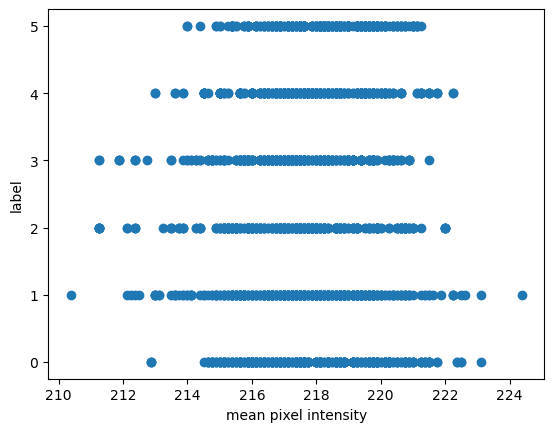

In [590]:
mean_intensities = [np.mean(sample) for sample in X_balanced]

plt.scatter(mean_intensities, y_balanced)
plt.xlabel('mean pixel intensity')
plt.ylabel('label')
plt.show()

## Data Preprocessing

### 7. General Preprocessing

In [583]:
import torch
import numpy as np

def preprocess_video(video, target_frames):
    # Get the number of frames, height, and width of the video
    num_frames, height, width = video.shape
    
    if num_frames < target_frames:
        num_padding = target_frames - num_frames
        last_frame = video[-1]
        padding = np.repeat(last_frame[np.newaxis, ...], num_padding, axis = 0)
        padded_video = np.concatenate((video, padding), axis = 0)
    else:
        padded_video = video[:target_frames]

    # Normalize the pixel values to the range [0, 1]
    padded_video = padded_video.astype(np.float32) / 255.0


    # Convert the padded video to a PyTorch tensor
    preprocessed_video = torch.tensor(padded_video)

    return preprocessed_video

In [584]:
from sklearn.model_selection import train_test_split

#did not work
#max_frames = -1000
#for video in X_balanced:
#    max_frames = max(max_frames, len(video))
#print(max_frames)

preprocessed_videos = []

for video in X_balanced:
    preprocessed_video = preprocess_video(video, 16)
    preprocessed_videos.append(preprocessed_video)

X_train, X_test, y_train, y_test = train_test_split(preprocessed_videos, y_balanced, test_size = 0.2, random_state = 42)

X_train_tensor = torch.stack(X_train)
y_train_tensor = torch.tensor(y_train, dtype = torch.int64)

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

In [585]:
'''
#latest working model DO NOT TOUCH (working space to store my latest working model)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

class VideoCNN(nn.Module):
    def __init__(self, num_classes, dropout_prob = 0.5):
        super(VideoCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.bn1 = nn.BatchNorm3d(16)
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.bn2 = nn.BatchNorm3d(32)
        self.pool2 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.bn3 = nn.BatchNorm3d(64)
        self.pool3 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        
        self.dropout = nn.Dropout(dropout_prob)
        
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)

print(torch.isnan(X_balanced_tensor).any())
print(torch.isnan(torch.tensor(y_train_tensor)).any())

model = VideoCNN(num_classes=len(np.unique(y_train_tensor)))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay = 0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for videos, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(videos.unsqueeze(1))
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
'''

"\n#latest working model DO NOT TOUCH (working space to store my latest working model)\nimport torch\nimport torch.nn as nn\nimport torch.nn.functional as F\nimport torch.optim as optim\nimport torch.utils.data as data\n\nclass VideoCNN(nn.Module):\n    def __init__(self, num_classes, dropout_prob = 0.5):\n        super(VideoCNN, self).__init__()\n        self.conv1 = nn.Conv3d(1, 16, kernel_size=(3, 3, 3), padding=(1, 1, 1))\n        self.bn1 = nn.BatchNorm3d(16)\n        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))\n        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=(1, 1, 1))\n        self.bn2 = nn.BatchNorm3d(32)\n        self.pool2 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))\n        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))\n        self.bn3 = nn.BatchNorm3d(64)\n        self.pool3 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))\n        \n        self.dropout = nn.Dropout(dropout_prob)\n 

### 10. Creating models

In [586]:
#final proper model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

class VideoCNN(nn.Module):
    def __init__(self, num_classes, dropout_prob = 0.3):
        super(VideoCNN, self).__init__()
        self.conv1 = nn.Conv3d(1, 16, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.bn1 = nn.BatchNorm3d(16)
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.bn2 = nn.BatchNorm3d(32)
        self.pool2 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1))
        self.bn3 = nn.BatchNorm3d(64)
        self.pool3 = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))
        
        self.dropout = nn.Dropout(dropout_prob)
        
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)

print(torch.isnan(X_balanced_tensor).any())
print(torch.isnan(torch.tensor(y_train_tensor)).any())

model = VideoCNN(num_classes=len(np.unique(y_train_tensor)))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0006, weight_decay = 0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for videos, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(videos.unsqueeze(1))
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

tensor(False)
tensor(False)


C:\Users\wenji\AppData\Local\Temp\ipykernel_25400\2245162402.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.isnan(torch.tensor(y_train_tensor)).any())


Epoch [1/10], Loss: 1.0238
Epoch [2/10], Loss: 0.5980
Epoch [3/10], Loss: 0.7582
Epoch [4/10], Loss: 0.2114
Epoch [5/10], Loss: 0.0834
Epoch [6/10], Loss: 0.1162
Epoch [7/10], Loss: 0.0051
Epoch [8/10], Loss: 0.0019
Epoch [9/10], Loss: 0.0055
Epoch [10/10], Loss: 0.0021


### 11. Model Evaluation

In [587]:
from sklearn.metrics import f1_score

# Assuming you have X_test and y_test as your testing data

# Convert X_test to a tensor
X_test_tensor = torch.stack(X_test)
y_test_tensor = torch.tensor(y_test, dtype = torch.int64)

# Create a TensorDataset and DataLoader for the testing data
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Initialize variables to store predictions and true labels
    y_true = []
    y_pred = []

    # Iterate over the testing data
    for videos, labels in test_loader:
        # Forward pass
        outputs = model(videos.unsqueeze(1))
        
        # Get the predicted labels
        _, predicted = torch.max(outputs, 1)
        
        # Append the true labels and predicted labels to the lists
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Calculate the accuracy
f1 = f1_score(y_true, y_pred, average = 'macro')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9319


### 12. Hyperparameters Search

In [557]:
from sklearn.model_selection import ParameterGrid

# Define the hyperparameter search space
param_grid = {
    'learning_rate': [0.001, 0.0006, 0.0003],
    'batch_size': [16, 32, 64],
    'dropout_prob': [0.3, 0.5, 0.7],
    'num_epochs': [10, 15, 20]
}

# Generate all possible combinations of hyperparameters
hyperparameter_combinations = ParameterGrid(param_grid)

# Keep track of the best hyperparameters and best F1 score
best_hyperparameters = None
best_f1_score = 0.0

# Iterate over each combination of hyperparameters
for params in hyperparameter_combinations:
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    dropout_prob = params['dropout_prob']
    num_epochs = params['num_epochs']

    # Create a new instance of the model with the current hyperparameters
    model = VideoCNN(num_classes=len(np.unique(y_train_tensor)), dropout_prob=dropout_prob)

    # Define the loss function and optimizer with the current learning rate
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

    # Create a new DataLoader with the current batch size
    train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train the model with the current hyperparameters
    for epoch in range(num_epochs):
        for videos, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(videos.unsqueeze(1))
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluate the model on the test set and calculate the F1 score
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        f1 = f1_score(y_test, predicted.numpy(), average='weighted')

    print(f'Hyperparameters: {params}, F1 Score: {f1:.4f}')

    # Update the best hyperparameters and best F1 score if the current F1 score is higher
    if f1 > best_f1_score:
        best_hyperparameters = params
        best_f1_score = f1

print(f'Best Hyperparameters: {best_hyperparameters}')
print(f'Best F1 Score: {best_f1_score:.4f}')

Epoch [1/10], Loss: 1.1995
Epoch [2/10], Loss: 0.7094
Epoch [3/10], Loss: 0.5624
Epoch [4/10], Loss: 0.3727
Epoch [5/10], Loss: 0.0874
Epoch [6/10], Loss: 0.0357
Epoch [7/10], Loss: 0.0496
Epoch [8/10], Loss: 0.1428
Epoch [9/10], Loss: 0.0830
Epoch [10/10], Loss: 0.0243
Hyperparameters: {'batch_size': 16, 'dropout_prob': 0.3, 'learning_rate': 0.001, 'num_epochs': 10}, F1 Score: 0.9300
Epoch [1/15], Loss: 1.2904
Epoch [2/15], Loss: 0.6456
Epoch [3/15], Loss: 0.7859
Epoch [4/15], Loss: 0.5548
Epoch [5/15], Loss: 0.1548
Epoch [6/15], Loss: 0.0789
Epoch [7/15], Loss: 0.1396
Epoch [8/15], Loss: 0.0147
Epoch [9/15], Loss: 0.0539
Epoch [10/15], Loss: 0.0025
Epoch [11/15], Loss: 0.1709
Epoch [12/15], Loss: 0.0018
Epoch [13/15], Loss: 0.0076
Epoch [14/15], Loss: 0.0016
Epoch [15/15], Loss: 0.0059
Hyperparameters: {'batch_size': 16, 'dropout_prob': 0.3, 'learning_rate': 0.001, 'num_epochs': 15}, F1 Score: 0.9129
Epoch [1/20], Loss: 1.0259
Epoch [2/20], Loss: 0.3699
Epoch [3/20], Loss: 0.4707
Epo

Hyperparameters: {'batch_size': 16, 'dropout_prob': 0.5, 'learning_rate': 0.0003, 'num_epochs': 10}, F1 Score: 0.9020
Epoch [1/15], Loss: 1.1047
Epoch [2/15], Loss: 0.8532
Epoch [3/15], Loss: 0.7749
Epoch [4/15], Loss: 0.3706
Epoch [5/15], Loss: 0.2863
Epoch [6/15], Loss: 0.1244
Epoch [7/15], Loss: 0.0832
Epoch [8/15], Loss: 0.1353
Epoch [9/15], Loss: 0.0259
Epoch [10/15], Loss: 0.0326
Epoch [11/15], Loss: 0.0025
Epoch [12/15], Loss: 0.0048
Epoch [13/15], Loss: 0.0221
Epoch [14/15], Loss: 0.0035
Epoch [15/15], Loss: 0.0055
Hyperparameters: {'batch_size': 16, 'dropout_prob': 0.5, 'learning_rate': 0.0003, 'num_epochs': 15}, F1 Score: 0.8817
Epoch [1/20], Loss: 1.4089
Epoch [2/20], Loss: 0.8886
Epoch [3/20], Loss: 0.5425
Epoch [4/20], Loss: 0.5007
Epoch [5/20], Loss: 0.0910
Epoch [6/20], Loss: 0.3617
Epoch [7/20], Loss: 0.0712
Epoch [8/20], Loss: 0.0958
Epoch [9/20], Loss: 0.0499
Epoch [10/20], Loss: 0.0411
Epoch [11/20], Loss: 0.0465
Epoch [12/20], Loss: 0.0055
Epoch [13/20], Loss: 0.011

Epoch [7/15], Loss: 0.0310
Epoch [8/15], Loss: 0.0189
Epoch [9/15], Loss: 0.0157
Epoch [10/15], Loss: 0.0020
Epoch [11/15], Loss: 0.0100
Epoch [12/15], Loss: 0.0080
Epoch [13/15], Loss: 0.0055
Epoch [14/15], Loss: 0.0040
Epoch [15/15], Loss: 0.0181
Hyperparameters: {'batch_size': 32, 'dropout_prob': 0.3, 'learning_rate': 0.0006, 'num_epochs': 15}, F1 Score: 0.9042
Epoch [1/20], Loss: 1.5856
Epoch [2/20], Loss: 0.7460
Epoch [3/20], Loss: 0.4276
Epoch [4/20], Loss: 0.2970
Epoch [5/20], Loss: 0.3066
Epoch [6/20], Loss: 0.0886
Epoch [7/20], Loss: 0.2281
Epoch [8/20], Loss: 0.1186
Epoch [9/20], Loss: 0.0343
Epoch [10/20], Loss: 0.0173
Epoch [11/20], Loss: 0.0092
Epoch [12/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0040
Epoch [14/20], Loss: 0.0108
Epoch [15/20], Loss: 0.0232
Epoch [16/20], Loss: 0.0119
Epoch [17/20], Loss: 0.0082
Epoch [18/20], Loss: 0.0048
Epoch [19/20], Loss: 0.0072
Epoch [20/20], Loss: 0.0044
Hyperparameters: {'batch_size': 32, 'dropout_prob': 0.3, 'learning_rate': 0.0006, 

Epoch [1/20], Loss: 1.8277
Epoch [2/20], Loss: 1.7795
Epoch [3/20], Loss: 1.3237
Epoch [4/20], Loss: 1.2259
Epoch [5/20], Loss: 0.9560
Epoch [6/20], Loss: 0.5662
Epoch [7/20], Loss: 0.5430
Epoch [8/20], Loss: 0.5312
Epoch [9/20], Loss: 0.6993
Epoch [10/20], Loss: 0.7389
Epoch [11/20], Loss: 0.8554
Epoch [12/20], Loss: 0.2814
Epoch [13/20], Loss: 0.4573
Epoch [14/20], Loss: 0.4968
Epoch [15/20], Loss: 0.4363
Epoch [16/20], Loss: 0.3456
Epoch [17/20], Loss: 0.3070
Epoch [18/20], Loss: 0.2252
Epoch [19/20], Loss: 0.3669
Epoch [20/20], Loss: 0.2650
Hyperparameters: {'batch_size': 32, 'dropout_prob': 0.7, 'learning_rate': 0.001, 'num_epochs': 20}, F1 Score: 0.8236
Epoch [1/10], Loss: 1.7867
Epoch [2/10], Loss: 1.7647
Epoch [3/10], Loss: 1.2150
Epoch [4/10], Loss: 1.0553
Epoch [5/10], Loss: 0.8129
Epoch [6/10], Loss: 0.7449
Epoch [7/10], Loss: 0.5499
Epoch [8/10], Loss: 0.8258
Epoch [9/10], Loss: 0.5403
Epoch [10/10], Loss: 0.4298
Hyperparameters: {'batch_size': 32, 'dropout_prob': 0.7, 'lea

Epoch [11/20], Loss: 0.0213
Epoch [12/20], Loss: 0.0107
Epoch [13/20], Loss: 0.0127
Epoch [14/20], Loss: 0.0107
Epoch [15/20], Loss: 0.0091
Epoch [16/20], Loss: 0.0077
Epoch [17/20], Loss: 0.0082
Epoch [18/20], Loss: 0.0045
Epoch [19/20], Loss: 0.0079
Epoch [20/20], Loss: 0.0129
Hyperparameters: {'batch_size': 64, 'dropout_prob': 0.3, 'learning_rate': 0.0003, 'num_epochs': 20}, F1 Score: 0.9128
Epoch [1/10], Loss: 1.6090
Epoch [2/10], Loss: 1.2084
Epoch [3/10], Loss: 0.7707
Epoch [4/10], Loss: 0.5010
Epoch [5/10], Loss: 0.4323
Epoch [6/10], Loss: 0.2498
Epoch [7/10], Loss: 0.2121
Epoch [8/10], Loss: 0.1399
Epoch [9/10], Loss: 0.0897
Epoch [10/10], Loss: 0.1510
Hyperparameters: {'batch_size': 64, 'dropout_prob': 0.5, 'learning_rate': 0.001, 'num_epochs': 10}, F1 Score: 0.9043
Epoch [1/15], Loss: 1.8474
Epoch [2/15], Loss: 1.5457
Epoch [3/15], Loss: 1.1185
Epoch [4/15], Loss: 1.0975
Epoch [5/15], Loss: 0.6834
Epoch [6/15], Loss: 0.7013
Epoch [7/15], Loss: 0.6559
Epoch [8/15], Loss: 0.180

Hyperparameters: {'batch_size': 64, 'dropout_prob': 0.7, 'learning_rate': 0.0006, 'num_epochs': 20}, F1 Score: 0.9100
Epoch [1/10], Loss: 1.6969
Epoch [2/10], Loss: 1.5088
Epoch [3/10], Loss: 1.1870
Epoch [4/10], Loss: 0.9695
Epoch [5/10], Loss: 0.7410
Epoch [6/10], Loss: 0.4585
Epoch [7/10], Loss: 0.3008
Epoch [8/10], Loss: 0.3339
Epoch [9/10], Loss: 0.3461
Epoch [10/10], Loss: 0.2430
Hyperparameters: {'batch_size': 64, 'dropout_prob': 0.7, 'learning_rate': 0.0003, 'num_epochs': 10}, F1 Score: 0.8922
Epoch [1/15], Loss: 1.7010
Epoch [2/15], Loss: 1.5964
Epoch [3/15], Loss: 1.3999
Epoch [4/15], Loss: 1.2736
Epoch [5/15], Loss: 0.8052
Epoch [6/15], Loss: 0.7358
Epoch [7/15], Loss: 0.5137
Epoch [8/15], Loss: 0.5403
Epoch [9/15], Loss: 0.2720
Epoch [10/15], Loss: 0.2921
Epoch [11/15], Loss: 0.2456
Epoch [12/15], Loss: 0.1869
Epoch [13/15], Loss: 0.2401
Epoch [14/15], Loss: 0.1236
Epoch [15/15], Loss: 0.1188
Hyperparameters: {'batch_size': 64, 'dropout_prob': 0.7, 'learning_rate': 0.0003, 